In [1]:
import numpy as np
import pandas as pd
import requests
import json

In [2]:
def load_data(region):
    """Loads electricity demand data into self.dataframe
    and performs some preliminary data cleaning operations.

    Args:
        region (str): relative path of the data file to be 
        loaded into Demand object.
    """
    url_stem = 'http://api.eia.gov/series/?api_key='
    api_key = 'bc8c4348f7c30988e817d0b1b54441c5'
    regions = {'US48': '&series_id=EBA.US48-ALL.D.HL',
                'CAL': '&series_id=EBA.CAL-ALL.D.HL',
                'CAR': '&series_id=EBA.CAR-ALL.D.HL',
                'CENT': '&series_id=EBA.CENT-ALL.D.HL',
                'FLA': '&series_id=EBA.FLA-ALL.D.HL',
                'MIDA': '&series_id=EBA.MIDA-ALL.D.HL',
                'MIDW': '&series_id=EBA.MIDW-ALL.D.HL',
                'NE': '&series_id=EBA.NE-ALL.D.HL', 
                'NY': '&series_id=EBA.NY-ALL.D.HL',
                'NW': '&series_id=EBA.NW-ALL.D.HL',
                'SE': '&series_id=EBA.SE-ALL.D.HL',
                'SW': '&series_id=EBA.SW-ALL.D.HL',
                'TEN': '&series_id=EBA.TEN-ALL.D.HL',
                'TEX': '&series_id=EBA.TEX-ALL.D.HL'}
    url = url_stem + api_key + regions[region]
    r = requests.get(url)
    pull = r.json()
    hourly_data = pull['series'][0]['data']
    df = pd.DataFrame(hourly_data, columns=['Time', 'Megawatthours'])
    df['Time'] = df['Time'].apply(lambda x: x[:-3])
    df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
    df = df.loc[::-1]
    df = df[1:]
    df.reset_index(inplace=True, drop=True)
    return df

In [3]:
ny_hourly = load_data('NY')

In [4]:
ny_hourly.head()

,Time,Megawatthours
0,2015-07-01 02:00:00,16027
1,2015-07-01 03:00:00,15541
2,2015-07-01 04:00:00,15283
3,2015-07-01 05:00:00,15304
4,2015-07-01 06:00:00,15874


In [5]:
ny_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50684 entries, 0 to 50683
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           50684 non-null  datetime64[ns]
 1   Megawatthours  50684 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 792.1 KB


In [6]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('Demand_class'), '..', 'src'))
from Demand_class import Demand

In [7]:
ny = Demand()

In [8]:
ny.load_data('NY')

In [9]:
ny.dataframe

,Time,Megawatthours
0,2015-07-01 02:00:00,16027
1,2015-07-01 03:00:00,15541
2,2015-07-01 04:00:00,15283
3,2015-07-01 05:00:00,15304
4,2015-07-01 06:00:00,15874
...,...,...
50679,2021-04-11 17:00:00,15202
50680,2021-04-11 18:00:00,15492
50681,2021-04-11 19:00:00,15621
50682,2021-04-11 20:00:00,15773


In [10]:
ny.create_time_featues()

In [11]:
ny.time_features_df

,Time,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
0,2015-07-01 02:00:00,16027,2015,7,2,2,1,182
1,2015-07-01 03:00:00,15541,2015,7,3,2,1,182
2,2015-07-01 04:00:00,15283,2015,7,4,2,1,182
3,2015-07-01 05:00:00,15304,2015,7,5,2,1,182
4,2015-07-01 06:00:00,15874,2015,7,6,2,1,182
...,...,...,...,...,...,...,...,...
50679,2021-04-11 17:00:00,15202,2021,4,17,6,11,101
50680,2021-04-11 18:00:00,15492,2021,4,18,6,11,101
50681,2021-04-11 19:00:00,15621,2021,4,19,6,11,101
50682,2021-04-11 20:00:00,15773,2021,4,20,6,11,101


In [12]:
ny.time_features_df.loc[ny.time_features_df['Time'] == '2020-03-01 00:00:00']

,Time,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
40919,2020-03-01,16967,2020,3,0,6,1,61


In [13]:
ny.time_features_df['Megawatthours'].loc[ny.time_features_df['Megawatthours'] == 0] = ny.time_features_df['Megawatthours'].mean()

/Users/ryanblauwaert/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
ny.time_features_df.loc[ny.time_features_df['Time'] == '2020-03-01 00:00:00']

,Time,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
40919,2020-03-01,16967.0,2020,3,0,6,1,61


In [15]:
ny.time_features_df

,Time,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
0,2015-07-01 02:00:00,16027.0,2015,7,2,2,1,182
1,2015-07-01 03:00:00,15541.0,2015,7,3,2,1,182
2,2015-07-01 04:00:00,15283.0,2015,7,4,2,1,182
3,2015-07-01 05:00:00,15304.0,2015,7,5,2,1,182
4,2015-07-01 06:00:00,15874.0,2015,7,6,2,1,182
...,...,...,...,...,...,...,...,...
50679,2021-04-11 17:00:00,15202.0,2021,4,17,6,11,101
50680,2021-04-11 18:00:00,15492.0,2021,4,18,6,11,101
50681,2021-04-11 19:00:00,15621.0,2021,4,19,6,11,101
50682,2021-04-11 20:00:00,15773.0,2021,4,20,6,11,101


In [16]:
split_idx = '2020-03-01 00:00:00'

In [17]:
X_train, X_test, y_train, y_test = ny.scale_split(ny.time_features_df, split_idx)

In [18]:
len(X_train)

40919

In [20]:
len(y_train)

40919

In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [22]:
params = {'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [23]:
xgb = XGBRegressor(**params)

In [24]:
xgb.fit(X_train, y_train)

[20:06:25] WARNING: ../src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=8,
             max_features='sqrt', min_child_weight=1, min_samples_leaf=2,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
preds = xgb.predict(X_test)

In [26]:
preds

array([16190.082, 15246.369, 14872.765, ..., 16014.752, 16303.417,
       16395.842], dtype=float32)

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mae = mean_absolute_error(y_test, preds)

In [29]:
mae

1163.746471875439

In [30]:
def plot_predictions_vs_true(ax, y_test, predictions, date_index):
    """Plots both y_true and y_predicted values on the same axes.

    Args:
        ax (axes): Axes on which to plot the predictions.
        y_test (arr): Matrix of actual target variables.
        predictions (arr): Matrix of predicted target variables.
        date_index (arr): Range of y_test indices; plotted along
        the x-axis
    """
    ax.plot(date_index, y_test, label='Actual')
    ax.plot(date_index, predictions, alpha=0.5, label='Predicted')
    ax.legend(fontsize=12)
    ax.set_xlabel('Date', size=16)
    ax.set_ylabel('Megawatthours', size=16)

In [31]:
import matplotlib.pyplot as plt

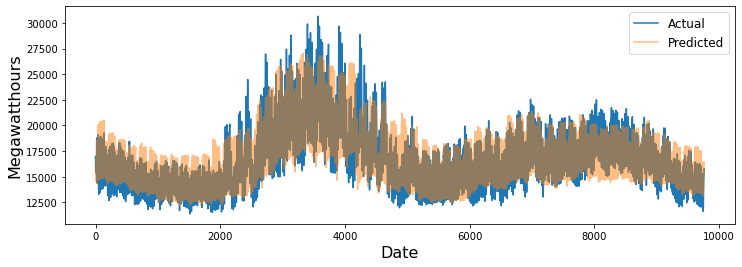

In [32]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_predictions_vs_true(ax, y_test, preds, range(len(y_test)))

In [33]:
def mean_abs_percent_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

In [34]:
mean_abs_percent_error(y_test, preds)

6.917072707945908